In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import bayesian_pdes as bpdes
from bayesian_pdes.problems import laplacian_natural_kernel
import sympy as sp

In [4]:
n_pts = 19

In [5]:
nat_op_cache = laplacian_natural_kernel.LaplacianNaturalKernel(5.0)

In [6]:
def rhs(x):
    return np.sin(2*np.pi*x)

design_points = np.linspace(0,1,n_pts+2)[1:-1, None]
g = rhs(design_points)

In [7]:
posterior = bpdes.collocate(nat_op_cache.operators, nat_op_cache.operators_bar, None, None, [(design_points, g)], op_cache=nat_op_cache)

In [8]:
test_points = np.linspace(0,1,51)[:,None]
mu, cov = posterior(test_points)
mu_mult, cov = posterior.no_obs_posterior(test_points)

/Users/benorn/.virtualenvs/stats/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


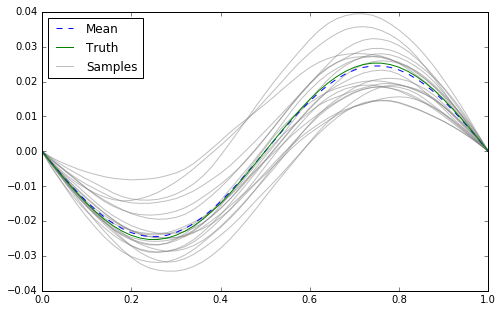

In [9]:
plt.figure(figsize=(8,5))
h_samples = plt.plot(test_points, np.random.multivariate_normal(mu.ravel(), cov, 20).T, c='gray', alpha=0.5);
h_mean = plt.plot(test_points, mu, linestyle='--', label='Mean Function')
#plt.plot(test_points, mu_new)
h_truth = plt.plot(test_points, -np.sin(2*np.pi*test_points)/(4*np.pi**2), label='Truth')
plt.legend((h_mean[0], h_truth[0], h_samples[0]), ('Mean', 'Truth', 'Samples'), loc=2)
plt.savefig('example_mean_samples.pdf', transparent=True, bbox_inches=0)

# Natural Kernel Picture

In [10]:
def tri_centroid(xs, ys):
    cent_x = np.sum(xs) / 3
    cent_y = np.sum(ys) / 3
    return cent_x, cent_y

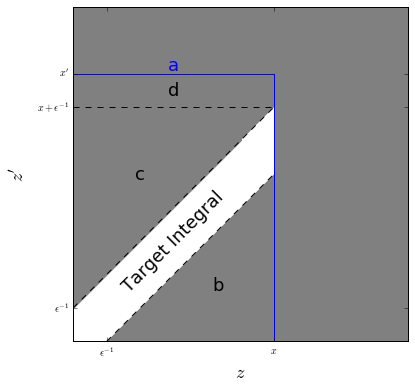

In [21]:
plt.figure(figsize=(6,6))
eps = 0.1
fs = 18
x = 0.6
box_color='blue'
x_prime = 0.8
#plt.plot([0, 0.9], [0.1, 1.0], c='black')
#plt.plot([0.1, 1.0], [0, 0.9], c='black')
plt.fill_between([0, x-eps], [eps, x], [x, x], color='gray')
plt.fill_between([0, x-eps], [x, x], [x_prime, x_prime], color='gray')
plt.fill_between([x-eps, x], [x, x_prime-eps], [x_prime, x_prime], hatch='*', color='gray', linewidth=0)
# outside area
plt.fill_between([eps, x], [0, 0], [0, x-eps], color='gray')
plt.fill_between([0, x], [x_prime, x_prime], [1, 1], color='gray')
plt.fill_between([x, 1], [0, 0], [1, 1], color='gray')
plt.plot([x, x], [0, x_prime], c=box_color)
plt.plot([0, x], [x_prime, x_prime], c=box_color)
plt.plot([0, x], [x+eps, x+eps], c='black', linestyle='--')
plt.plot([eps, x], [0, x-eps], c='black', linestyle='--')
plt.plot([0, x], [eps, x+eps], c='black', linestyle='--')

#plt.annotate('a', (x, x_prime-0.1), xytext=(x+eps,x_prime-eps), arrowprops=dict(facecolor='blue'), fontsize=fs)
plt.annotate('a', (x/2, x_prime+0.01), fontsize=fs, color=box_color, ha='center')
plt.annotate('b', tri_centroid([eps, x, x], [0, 0, x-eps]), fontsize=fs, va='center', ha='center')
plt.annotate('c', tri_centroid([0, x, 0], [eps, x+eps, x+eps]), fontsize=fs, va='center', ha='center')
plt.annotate('d', (x/2, x+eps+(x_prime-x-eps)/2), fontsize=fs, va='center', ha='center')

plt.text(x/2, x/2, 'Target Integral', ha='center', va='center', rotation=45, fontsize=fs)

plt.xticks([eps, x], ['$\\epsilon^{-1}$', '$x$'])
plt.yticks([eps, x+eps, x_prime], ['$\\epsilon^{-1}$', '$x+\\epsilon^{-1}$', "$x'$"])
plt.xlabel('$z$', fontsize=fs)
plt.ylabel("$z'$", fontsize=fs)
plt.xlim(0,1); plt.ylim(0,1);
plt.savefig('integral_sketch.pdf', transparent=True, bbox_inches=0)